# 1.3.2 Визуализация непрерывных распределений и их характеристик на python

In [1]:
# расширяем поле ноутбука для удобства
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:95% !important;}</style>'))

# убираем предупреждения
import warnings
warnings.filterwarnings('ignore')

C:\Users\User\AppData\Local\Temp\ipykernel_10232\586309859.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [3]:
import scipy.stats as sps

# 1. Непрерывные распределения

- 1. Стьюдента.
- 2. Хи-квадрат.
- 3. Коши.

## 1.1 Распределение Стьюдента

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t

### Пояснение

В теории вероятностей и математической статистике распределение Стьюдента — семейство непрерывных одномерных распределений с одним параметром: числом степеней свободы. 

Количество степеней свободы — это количество значений в итоговом вычислении статистики, способных варьироваться. Иными словами, количество степеней свободы показывает размерность вектора из случайных величин, количество «свободных» величин, необходимых, чтобы полностью определить вектор.

Форма распределения Стьюдента похожа на форму нормального распределения (чем больше число степеней свободы, тем ближе распределение к нормальному). Отличием является то, что «хвосты» распределения Стьюдента медленнее стремятся к нулю, чем «хвосты» нормального распределения.

Обычно распределение Стьюдента применяется в задачах, связанных с оценкой математического ожидания нормально распределенных случайных величин в условиях, когда объём выборки невелик, а также значимости различия средних двух выборок. В анализе данных распределение Стьюдента используется для проверки гипотез о значимости моделей регрессии.

### Обозначение

$X \sim t(n) $

### Параметры

n>0 — число степеней свободы

### Математическое ожидание

$$E(X) = 0, n>1$$

### Дисперсия 

$$Var[X] = \frac{n}{n-2}, n>2$$

### Построение графиков

In [ ]:
rv_stud = sps.t(df=20, loc=0, scale=1)

print('Математическое ожидание: ', rv_stud.mean())
print('Дисперсия: ', rv_stud.var())

Математическое ожидание:  0.0
Дисперсия:  1.1111111111111112


In [ ]:
# Формирование выборки
sample = rv_stud.rvs(size=200)

print('Выборочное среднее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Выборочное среднее: 0.064
Выборочная дисперсия: 1.076


### Функция плотности вероятности (PDF)

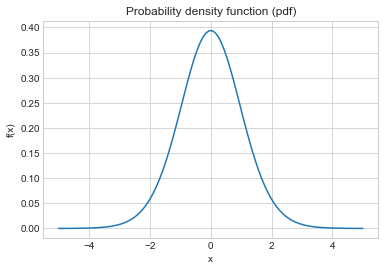

In [ ]:
X = np.linspace(-5, 5, 100)
plt.plot(X, rv_stud.pdf(X))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Probability density function (pdf)')
plt.show()

### Функция распределения (CDF)

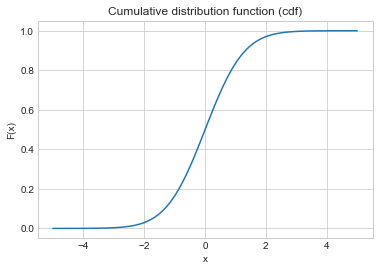

In [ ]:
X = np.linspace(-5, 5,100)
plt.plot(X, rv_stud.cdf(X))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Cumulative distribution function (cdf)')
plt.show()

## 1.2 Распределение Хи-квадрат

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html#scipy.stats.chi2

### Пояснение

Распределе́ние $\chi ^{2}$ (хи-квадра́т) с k степеня́ми свобо́ды — распределение суммы квадратов k независимых стандартных нормальных случайных величин.

Распределение хи-квадрат используют при оценивании дисперсии (с помощью доверительного интервала), при проверке гипотез согласия, однородности, независимости, прежде всего для качественных (категоризованных) переменных, принимающих конечное число значений, и во многих других задачах статистического анализа данных

### Обозначение

$X \sim \chi^2(k) $

### Параметры

k>0 — число степеней свободы

### Математическое ожидание

$$E(X) = k$$

### Дисперсия 

$$Var[X] = 2k$$

### Построение графиков

In [ ]:
rv_chi2 = sps.chi2(df = 55)

print('Математическое ожидание: ', rv_chi2.mean())
print('Дисперсия: ', rv_chi2.var())

Математическое ожидание:  55.0
Дисперсия:  110.0


In [ ]:
# Формирование выборки
sample = rv_chi2.rvs(size=200)

print('Выборочное среднее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Выборочное среднее: 55.863
Выборочная дисперсия: 110.870


### Функция плотности вероятности (PDF)

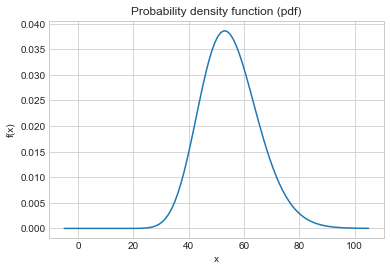

In [ ]:
X = np.linspace(-5, 105, 100)
plt.plot(X, rv_chi2.pdf(X))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Probability density function (pdf)')
plt.show()

### Функция распределения (CDF)

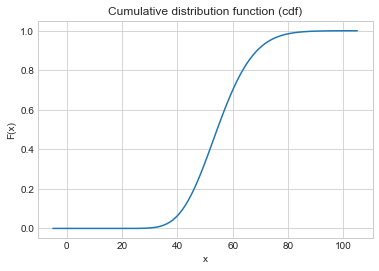

In [ ]:
X = np.linspace(-5, 105,100)
plt.plot(X, rv_chi2.cdf(X))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Cumulative distribution function (cdf)')
plt.show()

## 1.3 Распределение Коши

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html#scipy.stats.cauchy

### Пояснение

Распределение Коши описывает отношение двух нормально распределённых случайных величин. Случайная величина, имеющая распределение Коши, является стандартным примером величины, **не имеющей математического ожидания и дисперсии**.

### Обозначение

$X \sim C(x_0, \gamma) $

### Параметры

$x_{0}$ — коэффициент сдвига        
$\gamma > 0$ — коэффициент масштаба

### Математическое ожидание

$$E(X) = не\_существует$$

### Дисперсия 

$$Var[X] = не\_существует$$

### Построение графиков

In [ ]:
rv_cauchy = sps.cauchy(loc=0, scale=1)

print('Математическое ожидание: ', rv_cauchy.mean())
print('Дисперсия: ', rv_cauchy.var())

Математическое ожидание:  nan
Дисперсия:  nan


In [ ]:
# Формирование выборки
sample = rv_cauchy.rvs(size=200)

print('Выборочное среднее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Выборочное среднее: -0.314
Выборочная дисперсия: 23.080


### Функция плотности вероятности (PDF)

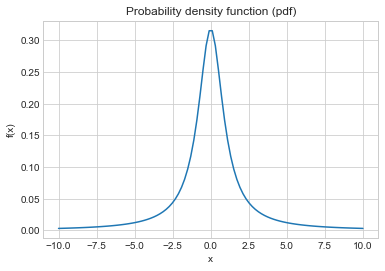

In [ ]:
X = np.linspace(-10, 10, 100)
plt.plot(X, rv_cauchy.pdf(X))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Probability density function (pdf)')
plt.show()

### Функция распределения (CDF)

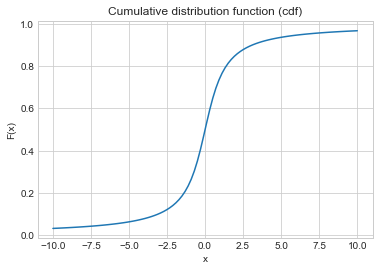

In [ ]:
X = np.linspace(-10, 10,100)
plt.plot(X, rv_cauchy.cdf(X))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Cumulative distribution function (cdf)')
plt.show()